In [1]:
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..')) 
sys.path.append(project_root)

from langgraph.graph import START, END, StateGraph
from typing import Annotated, List
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

from agents.exploration import exploration_node
from agents.supervisor import supervisor_node
from agents.task_agents.sqli import sqli_agent_node
from agents.task_agents.xss import xss_agent_node

from human_aid.human_node import human_node

checkpointer = MemorySaver()

class State(TypedDict):
    messages: Annotated[List[dict], add_messages]

builder = StateGraph(State)
builder.add_edge(START, "exploration")
builder.add_node("exploration", exploration_node)
builder.add_node("human", human_node)
builder.add_node("supervisor", supervisor_node)
builder.add_node("xss", xss_agent_node)
builder.add_node("sqli", sqli_agent_node)

graph = builder.compile(checkpointer=checkpointer)

/Users/siddansh/VPTech/maze/agents/exploration.py:20: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from tools.playwright_toolkit.custom_playwright_toolkit import PlayWrightBrowserToolkit


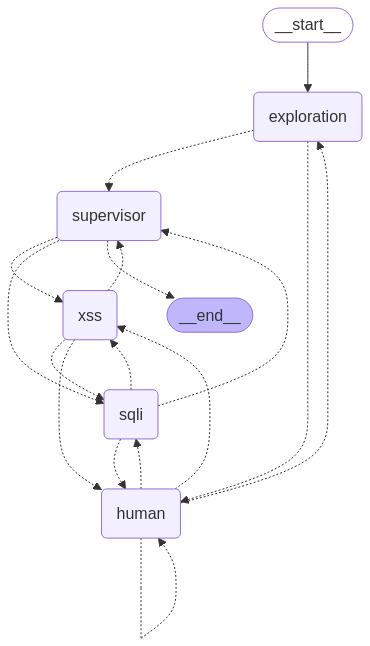

In [2]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))